In [58]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
from src import soporte as sp

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv("data/union_tablas.csv", index_col=0)
df.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


# FASE 3
## Evaluación de Diferencias de Reservas de Vuelos por Nivel Educativo

In [28]:
#Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

df_filtrado = df[["Education", "Flights Booked"]]
df_filtrado.head()

,Education,Flights Booked
0,Bachelor,3
1,Bachelor,2
2,Bachelor,14
3,Bachelor,4
4,Bachelor,0


In [29]:
#Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) 
#del número de vuelos reservados para cada grupo.

df_agrupado = df_filtrado.groupby("Education")["Flights Booked"].describe()
df_agrupado

#la media es similar

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,251400.0,4.129368,5.257359,0.0,0.0,1.0,8.0,39.0
College,101712.0,4.192209,5.287492,0.0,0.0,1.0,8.0,38.0
Doctor,17616.0,4.202770,5.305066,0.0,0.0,1.0,8.0,32.0
High School or Below,18768.0,4.208919,5.296142,0.0,0.0,1.0,8.0,31.0
Master,12192.0,4.233432,5.266140,0.0,0.0,1.0,8.0,33.0


In [ ]:
#  Prueba Estadística: 
# Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

<Axes: xlabel='Flights Booked', ylabel='Count'>

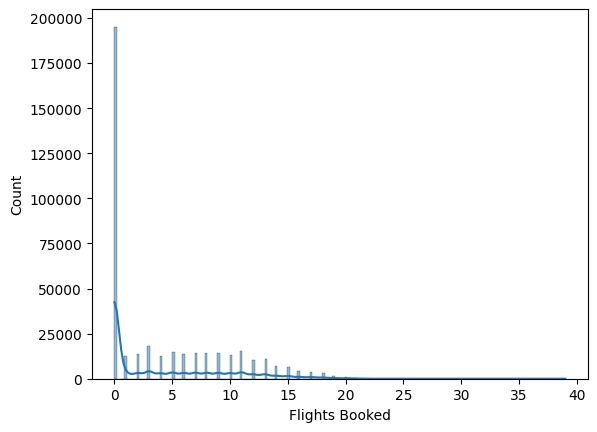

In [64]:
#comprobamos la distribución de los datos
sns.histplot(x = "Flights Booked", data = df_filtrado, kde=True);

In [ ]:
pd.crosstab(df_filtrado["Education"], df_filtrado["Flights Booked"])
# No es un problema de proporciones

In [65]:
sp.normalidad(df_filtrado, "Flights Booked")

#Evalio la normalidad de los datos utilizando la prueba de Shapiro.
#confirma que los datos NO siguen una distribución normal 

Para la columna Flights Booked los datos no siguen una distribución normal.


In [30]:
#Para clasificar el nivel de estudios en 2 grupos, primero hago un diccionario con los diferentes tipos de estudios y los asocio a un nivel: basic o advanced"
nivel_estudios = {"High School or Below": "Basic",
    "College": "Basic",  
    "Bachelor": "Advanced",
    "Master": "Advanced",
    "Doctor": "Advanced"}

In [31]:
#Creo una columna nueva con el nivel de educación y le aplico el diccionario con la función MAP
df_filtrado["Level Education"] = df_filtrado["Education"].map(nivel_estudios)

In [32]:
df_filtrado.head()

,Education,Flights Booked,Level Education
0,Bachelor,3,Advanced
1,Bachelor,2,Advanced
2,Bachelor,14,Advanced
3,Bachelor,4,Advanced
4,Bachelor,0,Advanced


In [72]:
#Hago 2 grupos para el estudio: grupo basic con nivel basico de estudios y grupo advanced con nivel avanzado de estudios
grupo_basic = df_filtrado[df_filtrado["Level Education"] == "Basic"]["Flights Booked"]
grupo_advanced = df_filtrado[df_filtrado["Level Education"] == "Advanced"]["Flights Booked"]

In [79]:
print(f"La media de vuelos realizados por el grupo con nivel de estudios básico es: {round(grupo_basic.mean(), 2)}")
print(f"La media de vuelos realizados por el grupo con nivel de estudios avanzados es: {round(grupo_advanced.mean(), 2)}")

La media de vuelos realizados por el grupo con nivel de estudios básico es: 4.19
La media de vuelos realizados por el grupo con nivel de estudios avanzados es: 4.14


In [ ]:
# ya que los datos no son normales, tenemos que hacer una prueba no paramétrica -> Mann Whitney

si p_value < 0.05 --> SI existe una diferencia significativa

si p_value > 0.05 --> NO existe diferencia significativa

In [59]:
_, p_value = mannwhitneyu(grupo_basic, grupo_advanced)

print(p_value)

0.0026215363669007336


In [60]:
p_value < 0.05

#SI existe una diferencia significativa entre el nivel de estudios y el número de vuelos realizados

np.True_